In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import rebound
import CreateMovie as movie
from matplotlib.patches import Circle
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import interp1d
from RV_stab import *
import scipy.optimize as op
import emcee
import corner

%matplotlib inline
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 18
mpl.rcParams['legend.numpoints'] = 1
plt.rc('lines', linewidth=1.0)
colors = ['4D4D4D','5DA5DA', 'FAA43A', '60BD68', 'F17CB0','B2912F','B276B2','DECF3F','F15854']
                                #  (blue)
                                # (orange)
                                # (green)
                                # (pink)
                                #  (brown)
                                # (purple)
                                #  (yellow)
                                # (red)
                                # ']
mpl.rcParams['axes.color_cycle'] = colors

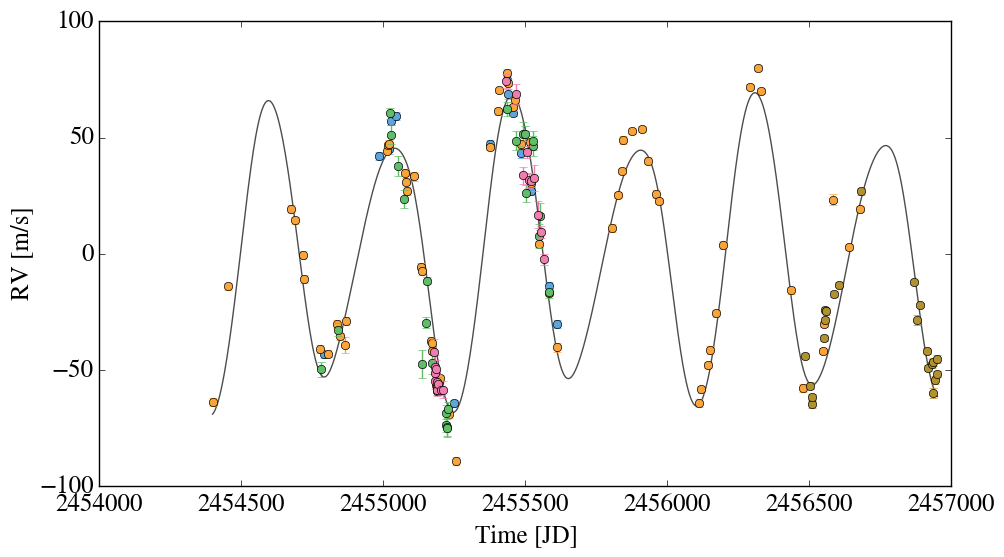

Saved


In [25]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.add_planet(per = 429.96951043, mass = 2.979157 , M = 63.748569, e=0.041800, pomega = 136.84729)
HD1502.add_planet(per = 765.37792853, mass =  0.321007, M = 118.50653, e=0.051500, pomega = 75.245987)
HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch,save=1)

In [26]:
print HD1502.calc_chi2(epoch=epoch)/(152-20)

45.1088986941


In [27]:
ratio_1 = (HD1502.planets[0].per/HD1502.planets[1].per)**(-1)
ratio_2 = (HD1502.planets[1].per/HD1502.planets[2].per)
ratio_3 = (HD1502.planets[0].per/HD1502.planets[2].per)


print ratio_1,ratio_2,ratio_3

1.78007488895 2.73249067807 1.53504253952


 0 %
 9 %
Integration took 0.72181 seconds
Energy Error is 18.339% 


0

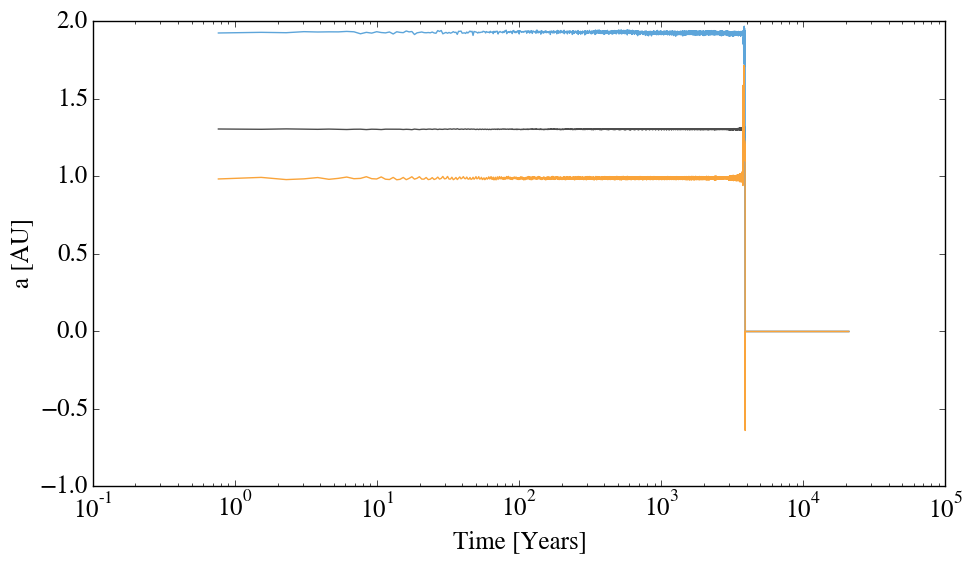

In [4]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=5,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
89 %
99 %
Integration took 33.88483 seconds
Energy Error is 0.000% 


1

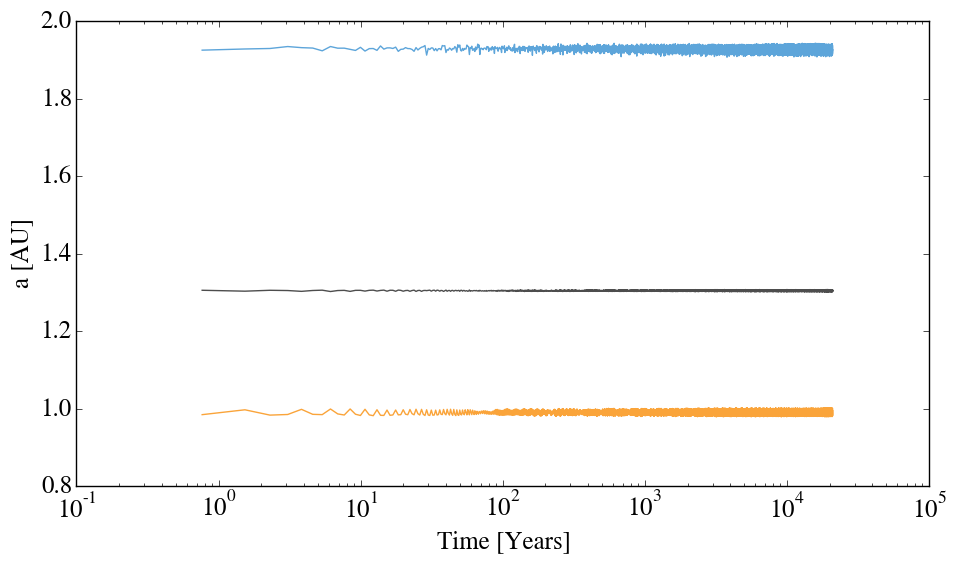

In [7]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=10,outputs_per_period=1,verbose=1,integrator='ias15',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [5]:
for planet in HD1502.planets:
    print planet.per, planet.mass

429.96951043 0.00284384368906
765.37792853 0.00030642686206
280.10266775 0.0004074720188


In [7]:
print 765.378/429.9695, 429.9565/280.10266775

1.78007509835 1.53499609073


In [27]:
(3*HD1502.planets[0].l-2*HD1502.planets[2].l-HD1502.planets[2].pomega)%(360)

351.24570700000004

In [28]:
(3*HD1502.planets[0].l-2*HD1502.planets[2].l-HD1502.planets[0].pomega)%(360)

171.24570700000004

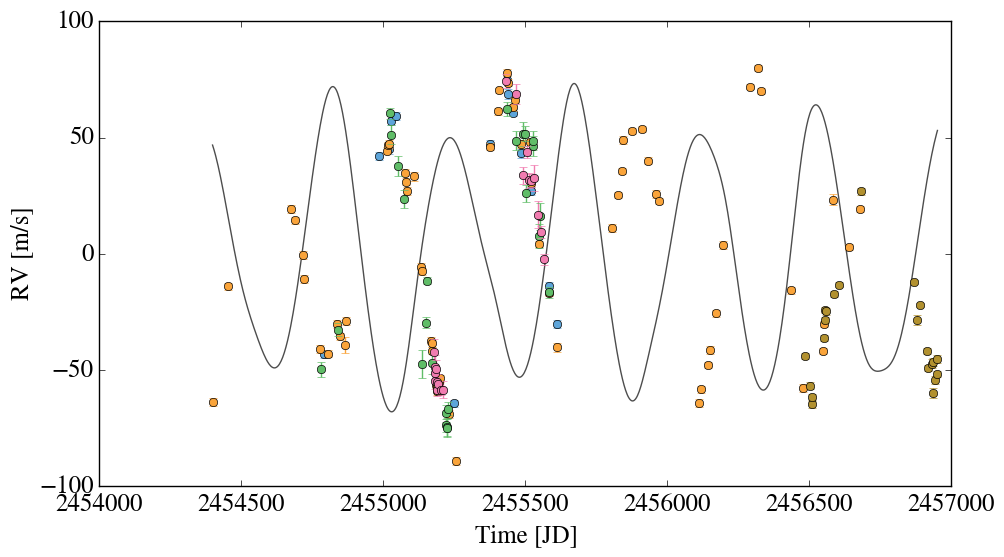

In [7]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.add_planet(per = 429.96951043, mass = 2.979157 , M = 63.748569, e=0.041800, pomega = 136.84729+180)
HD1502.add_planet(per = 765.37792853, mass =  0.321007, M = 118.50653, e=0.051500, pomega = 75.245987)
HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

 0 %
 9 %
Integration took 0.61803 seconds
Energy Error is 18.339% 


0

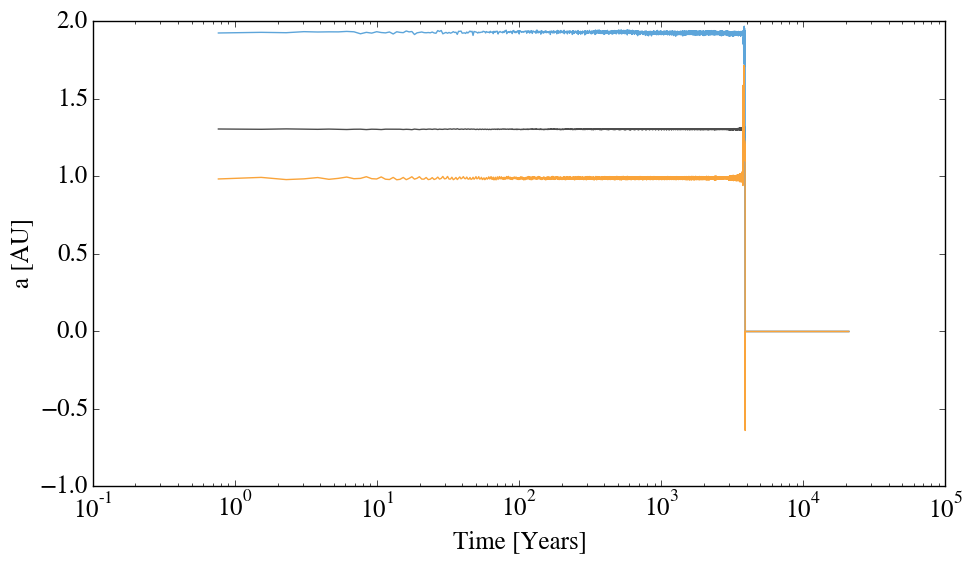

In [13]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=5,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [16]:
t0 = time.time()
print HD1502.stab_logprob(epoch=epoch)
print "That took %.5f seconds" %(time.time() - t0)

-3219.37193722
That took 2.27669 seconds


# Optimize Over Period

In [64]:
def per_mass_test(params,other_params,RVsys):
    per_1, per_2, per_3 = params
    mass_1, M_1, e_1, pomega_1, mass_2, M_2, e_2, pomega_2, mass_3, M_3, e_3, pomega_3, epoch = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per=per_1,mass=mass_1,M=M_1,e=e_1,pomega=pomega_1)
    RVsys.add_planet(per=per_2,mass=mass_2,M=M_2,e=e_2,pomega=pomega_2)
    RVsys.add_planet(per=per_3,mass=mass_3,M=M_3,e=e_3,pomega=pomega_3)
    return -RVsys.stab_logprob(epoch=epoch)

In [65]:
other_params = [2.979157, 63.748569, 0.041800, 136.84729,0.321007, 118.50653, 0.051500, 75.245987,
               0.426860, 190.00000, 0.1, 316.84729,epoch]

params = [429.96951043, 765.37792853, 280.10266775]

per_mass_test(params,other_params,HD1502)

3219.3719372173173

In [66]:
t_0 = time.time()
result = op.minimize(per_mass_test,params, args=(other_params,HD1502))
print "That took %.3f seconds" %(time.time()-t_0)

That took 3821.449 seconds


In [67]:
result.x[0]

427.66559689341921

In [70]:
# np.savetxt('opt_per_from_rmc',result.x)

In [18]:
per_mass_test(result.x,other_params,HD1502)

2707.2283189195787

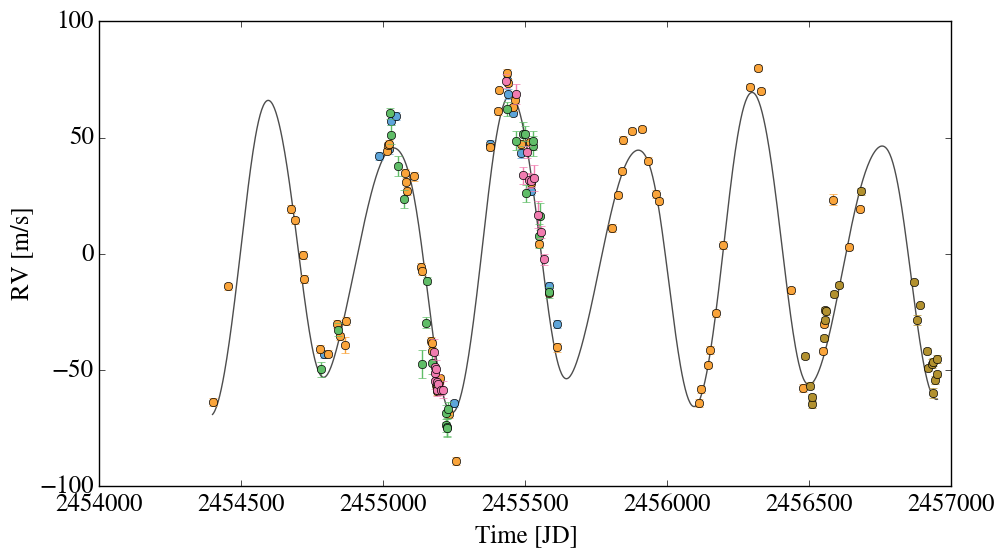

In [81]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

HD1502.add_planet(per = result.x[0], mass = 2.979157 , M = 63.748569, e=0.041800, pomega = 136.84729)
HD1502.add_planet(per = result.x[1], mass =  0.321007, M = 118.50653, e=0.051500, pomega = 75.245987)
HD1502.add_planet(per = result.x[2], mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
89 %
99 %
Integration took 3.72501 seconds
Energy Error is 0.000% 


1

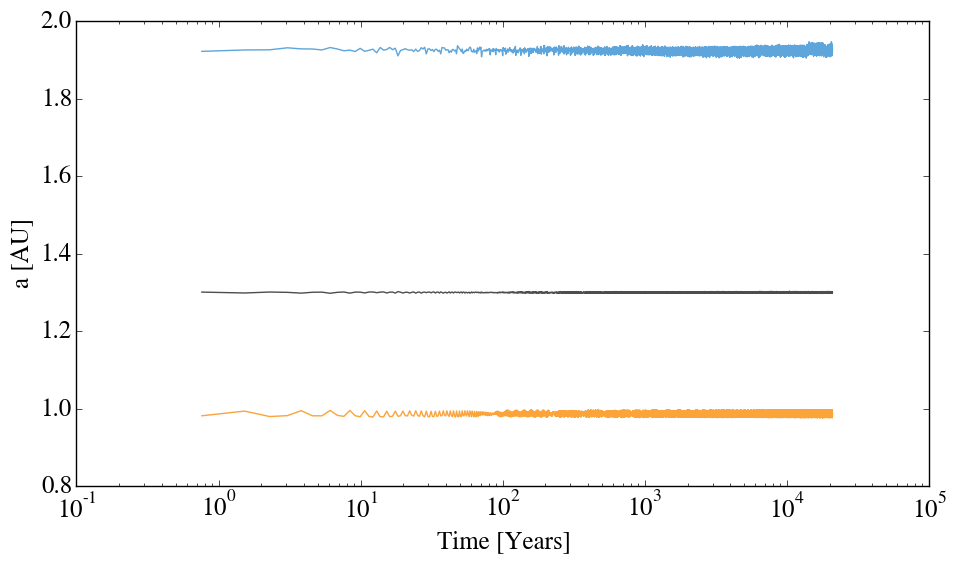

In [82]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

In [72]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

37.349146901728425

# Optimize over period and mass

In [83]:
def per_mass_test(params,other_params,RVsys):
    per_1, mass_1, per_2, mass_2, per_3, mass_3 = params
    M_1, e_1, pomega_1, M_2, e_2, pomega_2, M_3, e_3, pomega_3, epoch = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per=per_1,mass=mass_1,M=M_1,e=e_1,pomega=pomega_1)
    RVsys.add_planet(per=per_2,mass=mass_2,M=M_2,e=e_2,pomega=pomega_2)
    RVsys.add_planet(per=per_3,mass=mass_3,M=M_3,e=e_3,pomega=pomega_3)
    return -RVsys.stab_logprob(epoch=epoch)

In [84]:
new_pers = result.x

In [86]:
other_params = [63.748569, 0.041800, 136.84729, 118.50653, 0.051500, 75.245987,
               190.00000, 0.1, 316.84729,epoch]

params = [new_pers[0], 2.979157, new_pers[1], 0.321007, new_pers[2], 0.426860]

per_mass_test(params,other_params,HD1502)

2707.2283189195787

In [87]:
t_0 = time.time()
result = op.minimize(per_mass_test,params, args=(other_params,HD1502))
print "That took  %.3f seconds" %(time.time()-t_0)

That took 27865.885 seconds


In [135]:
print result.x

[  4.27572481e+02   2.87887973e+00   7.63857742e+02   4.92420795e-01
   2.78659908e+02   4.16761902e-01]


In [89]:
np.savetxt('opt_per_mass_from_rmc',result.x)

In [129]:
result.x = np.loadtxt('opt_per_mass_from_rmc')

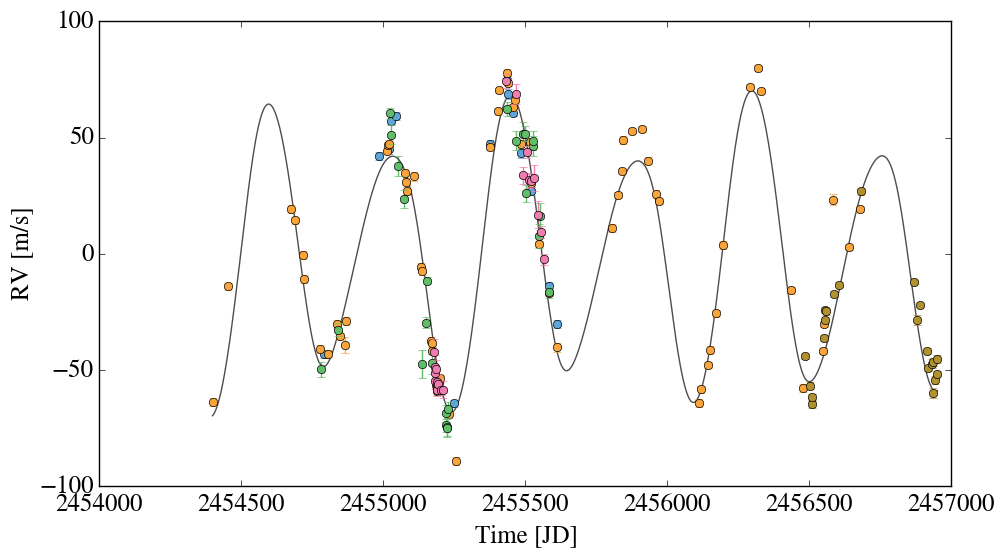

In [90]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

HD1502.add_planet(per = result.x[0], mass = result.x[1] , M = 63.748569, e=0.041800, pomega = 136.84729)
HD1502.add_planet(per = result.x[2], mass = result.x[3], M = 118.50653, e=0.051500, pomega = 75.245987)
HD1502.add_planet(per = result.x[4], mass = result.x[5], M = 190.00000, e=0.1, pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [91]:
per_mass_test(result.x,other_params,HD1502)

2556.4433327856686

In [92]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

35.064525899699461

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
Integration took 286.26545 seconds
Energy Error is 137.228% 


0

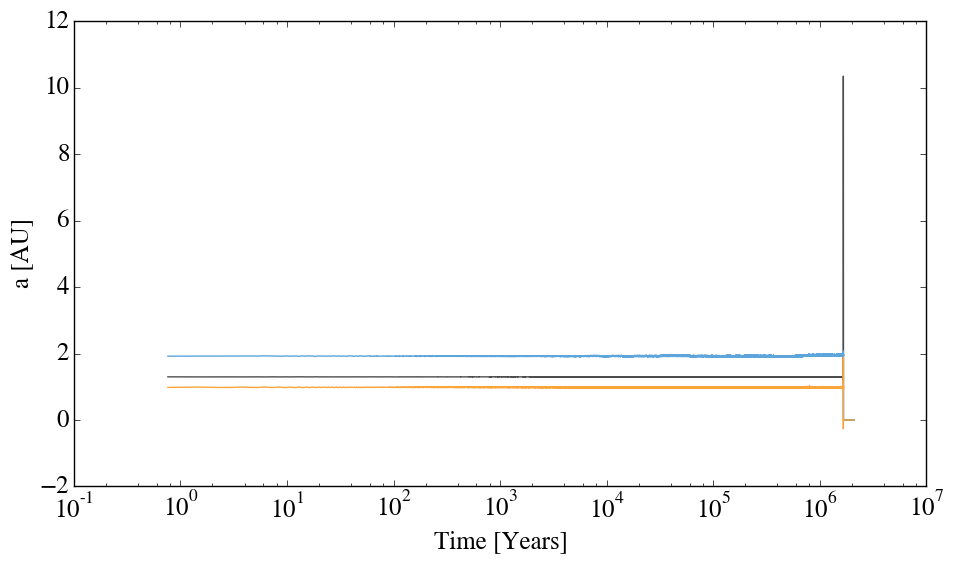

In [95]:
HD1502.orbit_stab(periods=1e6,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

# Optimize over period, mass, and eccentricity

In [155]:
def per_mass_ecc(params,other_params,RVsys,verb=0):
    per_1, mass_1, e_1, per_2, mass_2, e_2, per_3, mass_3, e_3 = params
    M_1, pomega_1, M_2, pomega_2, M_3, pomega_3, epoch = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per=per_1,mass=mass_1,M=M_1,e=e_1,pomega=pomega_1)
    RVsys.add_planet(per=per_2,mass=mass_2,M=M_2,e=e_2,pomega=pomega_2)
    RVsys.add_planet(per=per_3,mass=mass_3,M=M_3,e=e_3,pomega=pomega_3)
    
    if verb:
        print "per_1 = %.3f \nmass_1 = %.3f \ne_1 = %.3f \nper_2 = %.3f \nmass_2 = %.3f \ne_2 = %.3f \nper_3 = %.3f \nmass_3 = %.3f \ne_3 = %.3f\n\n" %(np.abs(per_1-per_mass_ecc.per_1), np.abs(mass_1-per_mass_ecc.mass_1),
                                                   np.abs(e_1-per_mass_ecc.e_1), np.abs(per_2-per_mass_ecc.per_2), 
                                                   np.abs(mass_2-per_mass_ecc.mass_2), np.abs(e_2-per_mass_ecc.e_2), 
                                                   np.abs(per_3-per_mass_ecc.per_3), np.abs(mass_3-per_mass_ecc.mass_3)
                                                   , np.abs(e_3-per_mass_ecc.e_3))
    per_mass_ecc.per_1 = per_1
    per_mass_ecc.per_2 = per_2
    per_mass_ecc.per_3 = per_3
    per_mass_ecc.mass_1 = mass_1
    per_mass_ecc.mass_2 = mass_2
    per_mass_ecc.mass_3 = mass_3
    per_mass_ecc.e_1 = e_1
    per_mass_ecc.e_2 = e_2
    per_mass_ecc.e_3 = e_3
    return -RVsys.stab_logprob(epoch=epoch)

In [136]:
new_params = result.x

In [156]:
other_params = [63.748569, 136.84729, 118.50653, 75.245987,
               190.00000, 316.84729,epoch]

params = [new_params[0], new_params[1], 0.0418, new_params[2], new_params[3], 0.0515, 
          new_params[4], new_params[5], 0.1]

per_mass_ecc.per_1 = new_params[0]
per_mass_ecc.per_2 = new_params[2]
per_mass_ecc.per_3 = new_params[4]
per_mass_ecc.mass_1 = new_params[1]
per_mass_ecc.mass_2 = new_params[3]
per_mass_ecc.mass_3 = new_params[5]
per_mass_ecc.e_1 = 0.0418
per_mass_ecc.e_2 = 0.0515
per_mass_ecc.e_3 = 0.1

per_mass_ecc(params,other_params,HD1502,verb=1)

per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000




2556.4433327856686

In [157]:
t_0 = time.time()
bounds = [(None,None),(None,None),(1e-4,0.95),(None,None),(None,None),(1e-4,0.95),(None,None),(None,None),(1e-4,0.95)]
result = op.minimize(per_mass_ecc,params, args=(other_params,HD1502,1),bounds=bounds)
print "That took %.3f seconds" %(time.time()-t_0)

per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0.000 
e_2 = 0.000 
per_3 = 0.000 
mass_3 = 0.000 
e_3 = 0.000


per_1 = 0.000 
mass_1 = 0.000 
e_1 = 0.000 
per_2 = 0.000 
mass_2 = 0

In [158]:
print result.x

[  4.27572481e+02   2.87887973e+00   4.18000000e-02   7.63857742e+02
   4.92420795e-01   5.15000000e-02   2.78659908e+02   4.16761902e-01
   1.00000000e-01]


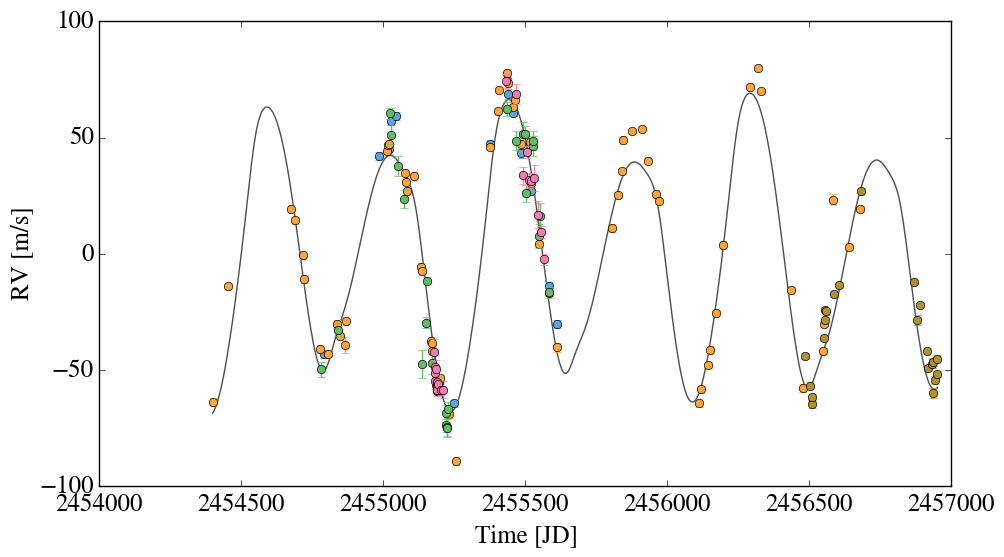

In [125]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

HD1502.add_planet(per = result.x[0], mass = result.x[1] , M = 63.748569, e=result.x[2], pomega = 136.84729)
HD1502.add_planet(per = result.x[3], mass = result.x[4], M = 118.50653, e=result.x[5], pomega = 75.245987)
HD1502.add_planet(per = result.x[6], mass = result.x[7], M = 190.00000, e=0.3, pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [126]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

33.45154331140035

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
89 %
99 %
Integration took 3.11233 seconds
Energy Error is 0.038% 


1

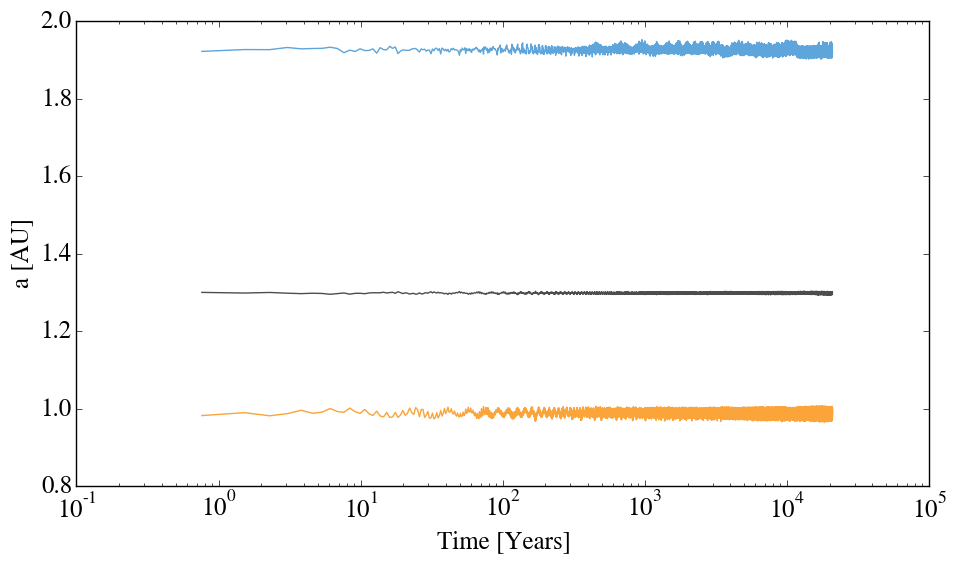

In [127]:
HD1502.orbit_stab(periods=1e4,pnts_per_period=10,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)

# Try just eccentricity

In [3]:
def ecc_opt(params,other_params,RVsys,verb=0):
    e_1, e_2, e_3,  = params
    per_1, mass_1, M_1, pomega_1, per_2, mass_2, M_2, pomega_2, per_3, mass_3, M_3, pomega_3, epoch = other_params
    RVsys.clear_planets()
    RVsys.add_planet(per=per_1,mass=mass_1,M=M_1,e=e_1,pomega=pomega_1)
    RVsys.add_planet(per=per_2,mass=mass_2,M=M_2,e=e_2,pomega=pomega_2)
    RVsys.add_planet(per=per_3,mass=mass_3,M=M_3,e=e_3,pomega=pomega_3)
    
    if verb:
        print "e_1 = %.9f \ne_2 = %.9f \ne_3 = %.9f\n" %(np.abs(e_1-ecc_opt.e_1), np.abs(e_2-ecc_opt.e_2)
                                                         , np.abs(e_3-ecc_opt.e_3))
        ecc_opt.e_1 = e_1
        ecc_opt.e_2 = e_2
        ecc_opt.e_3 = e_3
    return -RVsys.stab_logprob(epoch=epoch)

In [4]:
new_params = np.loadtxt('opt_per_mass_from_rmc')
print new_params

[  4.27572481e+02   2.87887973e+00   7.63857742e+02   4.92420795e-01
   2.78659908e+02   4.16761902e-01]


In [5]:
other_params = [new_params[0], new_params[1], 63.748569, 136.84729, new_params[2],new_params[3],  118.50653, 
                75.245987, new_params[4], new_params[5], 190.00000, 316.84729,epoch]
               

params = [0.0418, 0.0515, 0.1]
          

# per_mass_ecc.per_1 = new_params[0]
# per_mass_ecc.per_2 = new_params[2]
# per_mass_ecc.per_3 = new_params[4]
# per_mass_ecc.mass_1 = new_params[1]
# per_mass_ecc.mass_2 = new_params[3]
# per_mass_ecc.mass_3 = new_params[5]
ecc_opt.e_1 = params[0]
ecc_opt.e_2 = params[1]
ecc_opt.e_3 = params[2]

ecc_opt(params,other_params,HD1502,verb=1)

e_1 = 0.000000000 
e_2 = 0.000000000 
e_3 = 0.000000000



2556.4433327856686

In [6]:
t_0 = time.time()
bounds = [(0.01287087,0.01287087),(1e-5,2e-1),(2e-1,0.325)]
result = op.minimize(ecc_opt,params, args=(other_params,HD1502,1),bounds=bounds)
print "That took %.3f seconds" %(time.time()-t_0)

e_1 = 0.028929130 
e_2 = 0.000000000 
e_3 = 0.100000000

e_1 = 0.000000010 
e_2 = 0.000000000 
e_3 = 0.000000000

e_1 = 0.000000010 
e_2 = 0.000000010 
e_3 = 0.000000000

e_1 = 0.000000000 
e_2 = 0.000000010 
e_3 = 0.000000010

e_1 = 0.000000000 
e_2 = 0.051490000 
e_3 = 0.124999990

e_1 = 0.000000010 
e_2 = 0.000000000 
e_3 = 0.000000000

e_1 = 0.000000010 
e_2 = 0.000000010 
e_3 = 0.000000000

e_1 = 0.000000000 
e_2 = 0.000000010 
e_3 = 0.000000010

That took 19.001 seconds


In [7]:
result.x

array([  1.28708700e-02,   1.00000000e-05,   3.25000000e-01])

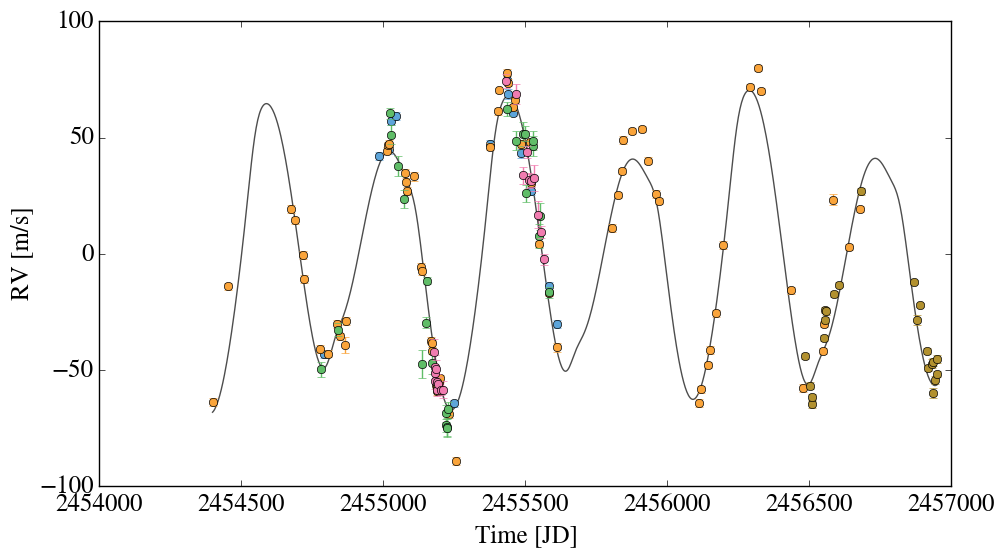

In [20]:
HD1502 = RVSystem(mstar = 1.61)
epoch = 2454410.0

HD1502.clear_planets()

HD1502.add_planet(per = new_params[0], mass = new_params[1] , M = 63.748569, e=result.x[0], pomega = 136.84729)
HD1502.add_planet(per = new_params[2], mass = new_params[3], M = 118.50653, e=result.x[1]*100, pomega = 75.245987)
HD1502.add_planet(per = new_params[4], mass = new_params[5], M = 190.00000, e=result.x[2], pomega = 316.84729)

# HD1502.add_planet(per =428.97639 mass = 2.84232 , M = 356.11152, e=0.02506, pomega = 10)
# HD1502.add_planet(per = 299.87399, mass =  0.41126, M = 309.45106, e=0.24124, pomega = 75.245987)
# HD1502.add_planet(per = 280.10266775, mass = 0.426860, M = 190.00000, e=0.1, pomega = 316.84729)


HD1502.RV_data = ['HD1502_KECK11.vels','HD1502_KECK.vels','HD1502_HJS11.vels','HD1502_HET11.vels','HD1502_APF.vels']
HD1502.offsets = [23.57647,0.56036,16.57065, -9.53612, 35.9585]
# HD1502.offsets = [2.928989e+01,5.087396e+00,2.174066e+01,-3.288000e+00,3.957321e+01]
HD1502.path_to_data = "/Applications/Systemic/datafiles/"

HD1502.plot_RV(epoch=epoch)

In [21]:
HD1502.calc_chi2(epoch=epoch)/(152-20)

32.118793573871962

 0 %
 9 %
19 %
29 %
39 %
49 %
59 %
69 %
79 %
89 %
Integration took 382.33611 seconds
Energy Error is 274.696% 
Planet 2 went unstable


0

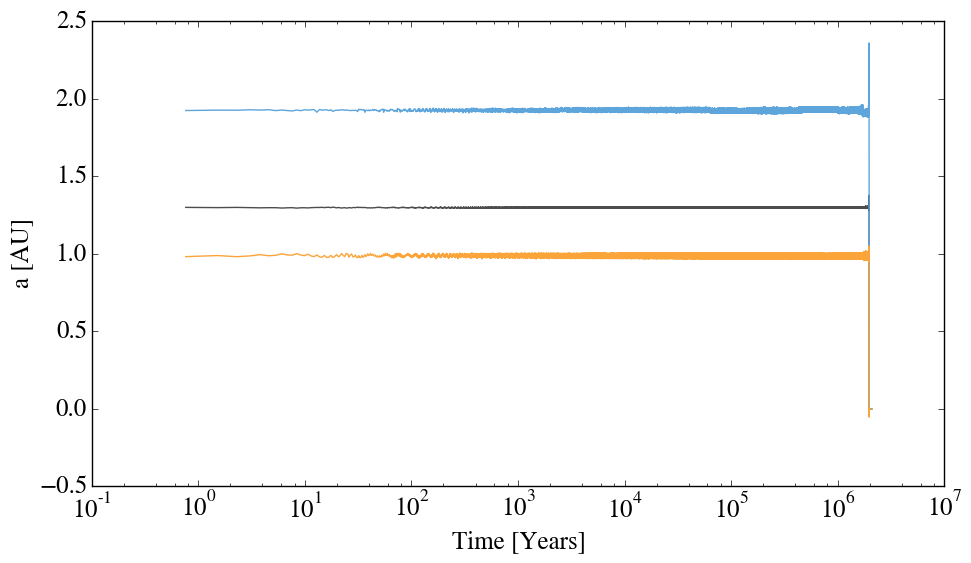

In [22]:
HD1502.orbit_stab(periods=1e6,pnts_per_period=20,outputs_per_period=1,verbose=1,integrator='whfast',safe=1
                  ,timing=1,plot=1,energy_err=1)